In [7]:
import pandas as pd
df=pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [9]:
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

In [11]:
df['Rating']=df['Rating'].apply(ratings)

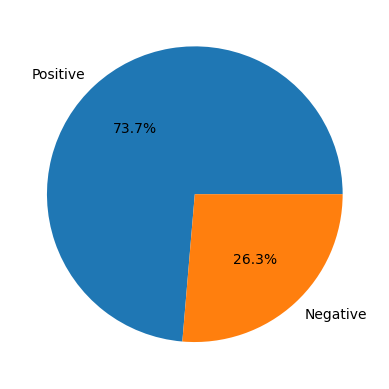

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['Rating'].value_counts(),
        labels=df['Rating'].unique().tolist(),
        autopct='%1.1f%%')
plt.show()

In [15]:
lenght=len(df['Review'][0])
print(f'Length of a sample review: {lenght}')

Length of a sample review: 593


In [17]:
df['Length']=df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281


In [19]:
word_count=df['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 87


In [21]:
def word_count(review):
    review_list=review.split()
    return len(review_list)

In [23]:
df['Word_count']=df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191


In [25]:
import numpy as np
df['mean_word_length']=df['Review'].map(lambda rev: np.mean([len(word)
                                                             for word in rev.split()]))
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571


In [ ]:
import nltk
nltk.download(

In [29]:
features=df.columns.tolist()[2:]
df=df.drop(features,axis=1)
df.head()


,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Negative
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [43]:
import re
from nltk.corpus import stopwords
def clean(review):
    review=review.lower()
    review=re.sub('[^a-z A-Z 0-9-]+', '',review)
    review=" ".join([word for word in review.split() if word not in stopwords.words('english')]) 
    return review

In [45]:
df['Review']=df['Review'].apply(clean)
df.head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\bhargavi/nltk_data'
    - 'C:\\Users\\bhargavi\\anaconda3\\nltk_data'
    - 'C:\\Users\\bhargavi\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\bhargavi\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\bhargavi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [51]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [47]:
def corpus(text):
    text_list=text.split()
    return text_list

In [49]:
df['Review_lists']=df['Review'].apply(corpus)
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,Negative,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,"unique, great stay, wonderful time hotel monac...",Positive,"[unique,, great, stay,, wonderful, time, hotel..."
4,"great stay great stay, went seahawk game aweso...",Positive,"[great, stay, great, stay,, went, seahawk, gam..."


In [57]:
from tqdm import trange
corpus=[]
for i in trange(df.shape[0],ncols=150,nrows=10,
                colour='green',smoothing=0.8):
    corpus+=df['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 89731.34it/s]


2138765

In [ ]:
from collections import Counter


In [1]:
words=[]
freq=[]
for word,count in mostCommon:
    words.append(word)
    freq.append(count)

NameError: name 'mostCommon' is not defined

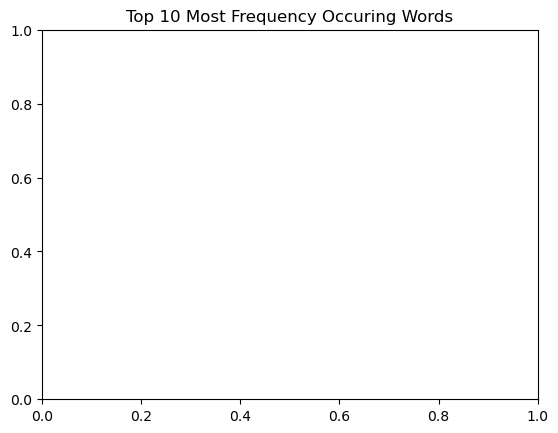

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title('Top 10 Most Frequency Occuring Words')
plt.show()

In [3]:
doc_trump="Mr.Trump became president after winning the political election.Though he lost the support of some republican friends,Trump is friends with President Putin"
doc_election="President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"
doc_putin="Post elections,Vladmir Putin beacme President of Russia. President Putin had served as the Prime Minister earlier in his political career"

documents=[doc_trump,doc_election,doc_putin]

In [11]:
#Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vect=CountVectorizer(stop_words='english')
count_vect=CountVectorizer()
sparse_matrix=count_vect.fit_transform(documents)

doc_term_matrix=sparse_matrix.todense()
df=pd.DataFrame(doc_term_matrix,
                columns=count_vect.get_feature_names_out(),
                index=['doc_trump','doc_election','doc_putin'])

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd

 

# Create the Document Term Matrix

count_vect = CountVectorizer(stop_words='english')

count_vect = CountVectorizer()

sparse_matrix = count_vect.fit_transform(documents)

 

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.

doc_term_matrix = sparse_matrix.todense()

df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vect.get_feature_names_out(), 

                  index=['doc_trump', 'doc_election', 'doc_putin'])

df



,after,as,beacme,became,by,career,claimed,do,earlier,election,...,the,though,to,trump,vladmir,was,who,winning,witchhunt,with
doc_trump,1,0,0,1,0,0,0,0,0,1,...,2,1,0,2,0,0,0,1,0,1
doc_election,0,0,0,0,1,0,1,1,0,2,...,2,0,1,1,0,1,1,0,1,1
doc_putin,0,1,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df,df))

[[1.         0.51480485 0.35355339]
 [0.51480485 1.         0.38829014]
 [0.35355339 0.38829014 1.        ]]


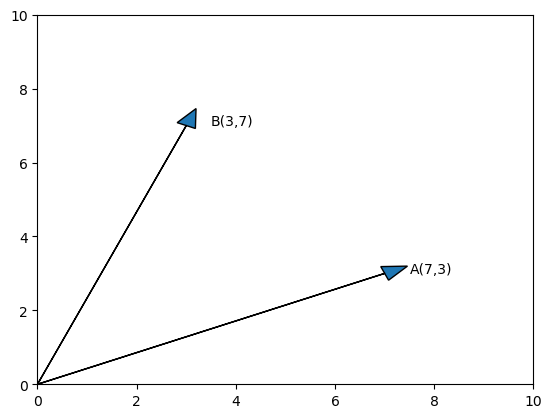

In [27]:
import numpy as np

import matplotlib.pyplot as plt

# consider two vectors A and B in 2-D

A = np.array([7,3])

B = np.array([3,7])

ax = plt.axes()

ax.arrow(0.0, 0.0, A[0], A[1], head_width=0.4, head_length=0.5)

plt.annotate(f"A({A[0]},{A[1]})", xy=(A[0], A[1]),xytext=(A[0]+0.5, A[1]))

ax.arrow(0.0, 0.0, B[0], B[1], head_width=0.4, head_length=0.5)

plt.annotate(f"B({B[0]},{B[1]})", xy=(B[0], B[1]),xytext=(B[0]+0.5, B[1]))

plt.xlim(0,10)

plt.ylim(0,10)

plt.show()

plt.close()

In [29]:
# cosine similarity between A and B

cos_sim = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

print (f"Cosine Similarity between A and B:{cos_sim}")

print (f"Cosine Distance between A and B:{1-cos_sim}")

Cosine Similarity between A and B:0.7241379310344827
Cosine Distance between A and B:0.27586206896551735


In [31]:

A = {1,2,3,4,6}

B = {1,2,5,8,9}

# Intersaction and Union of two sets can also be done using & and | operators.

C = A.intersection(B)

D = A.union(B)

print('AnB = ', C)

print('AUB = ', D)

print('J(A,B) = ', float(len(C))/float(len(D)))

AnB =  {1, 2}
AUB =  {1, 2, 3, 4, 5, 6, 8, 9}
J(A,B) =  0.25


In [7]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
responses=[
    "You can return an item within 7 days of purchase.",
    "Our return policy allows you to return items that are unopened and in their original comdition.",
    "we offer free shipping on orders over $50.",
    "To track your order,you can visit the 'Order Tracking' page and enter your order number.",
    "Our customer support team is avaiable from 9AM to 6PM, Monday through Friday."
]

In [13]:
user_input="How can I track my order?"

In [15]:
vectorizer = TfidfVectorizer(stop_words='english')
all_texts = responses + [user_input]
tfidf_matrix = vectorizer.fit_transform(all_texts)

In [25]:
user_vector = tfidf_matrix[-1]
similarity_scores = cosine_similarity(user_vector, tfidf_matrix[:-1])

In [27]:
most_similar_index = np.argmax(similarity_scores)
most_similar_response = responses[most_similar_index]

In [21]:
most_similar_idx=np.argmax(cosine_similarities)

In [29]:
print("User Input:", user_input)
print("Most Similar Response:", most_similar_response)

User Input: How can I track my order?
Most Similar Response: To track your order,you can visit the 'Order Tracking' page and enter your order number.


In [31]:
import io
import random
import string
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.stem import WordNetLemmatizer


In [ ]:
nltk.download('popular',quiet=True)
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
f=open('input.txt','r',errors='ignore')
raw=f.read()
raw=raw.lower()

In [ ]:
import nltk
sent_tokens=nltk.sent_tokenizer(raw)
word_tokens=nltk.word_tokenize(raw)

In [ ]:
lemmer=nltk.stem.WorkerLemmatizer()
def LemTokens(tokens):
    return [lemmer,lemmatize(token) for token in tokens]

In [29]:

f=open('input.txt','r',errors='ignore')
raw=f.read()
raw=raw.lower

FileNotFoundError: [Errno 2] No such file or directory: 'input.txt'

In [31]:
import nltk
sent_tokens=nltk.sent_tokenize(raw)
word_tokens=nltk.word_tokenize

NameError: name 'raw' is not defined

In [33]:
lemmer=nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove punct_dict=dict((ord(punct),None) for punct in string.punctuation)


SyntaxError: invalid syntax (4090516293.py, line 4)

In [35]:
GREETING_INPUTS = ("hello","hi","greetings","sup","what's up","hey")
GREETING_RESPONSES = ["hi","hey","nods","hi there","hello","I am glad! You are talking to me"]

def greeting(sentence):
  for word in sentence.split():
    if word.lower() in GREETING_INPUTS:
      return random.choice(GREETING_RESPONSES)

In [37]:
def response(user_response):
  robo_response = ''
  sent_tokens.append(user_response)
  tfidfVec = TfidfVectorizer(tokenizer=LemNormalize,stop_words='english')
  tfidf = tfidVec.fit_transform(sent_tokens)
  vals = cosine_similarity(tfidf[-1],tfidf)
  idx = vals.argsort()[0][-2]
  flat = vals.flatten()
  flat.sort()
  req_tfidf = flat[-2]
  if(req_tfidf==0):
    robo_response = robo_response+"I am sorry! I don't understand you"
    return robo_response
  else:
    robo_response = robo_response+sent_tokens[idx]
    return robo_response
      

In [39]:
flag=True
print("SABot: My name is SABot. How can I assist you?.If you want to exit, type Bye!"
while(flag==True):
    user_response=input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you'):
            flag=False
            print("SABot: You are welcome...')
        else:
            if(greeting(user_response)!=None):
                print("SABot:"+greeting(user_response))
            else:
                print("SABot: " end="")

SyntaxError: unterminated string literal (detected at line 9) (3885642350.py, line 9)

In [45]:
flag = True
print("SABot : My name is SABot. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while flag:
  user_response = input()
  user_response = user_response.lower()
  if user_response != 'bye':
    if user_response in ('thanks', 'thank you'):
      flag = False
      print("SABot : You are welcome..")
    else:
      if greeting(user_response):
        print("SABot : " + greeting(user_response))
      else:
        print("SABot : ", end="")
        print(response(user_response))
        sent_tokens.remove(user_response) 
  else:
    flag = False
    print("SABot : Bye! take care..")

SABot : My name is SABot. I will answer your queries about Chatbots. If you want to exit, type Bye!


 bye


SABot : Bye! take care..


In [1]:
sent = "Ram is studying at Malla Reddy University in Hyderabad,India"

In [3]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\bhargavi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [5]:
!pip install svglib

     ---------------------------------------- 0.0/913.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/913.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/913.9 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/913.9 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/913.9 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/913.9 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/913.9 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/913.9 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/913.9 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/913.9 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/913.9 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/913.9 kB ? eta -:--:--
     -------------------- --------------- 524.3/913.9 kB 144.6 kB/s eta 0:00:03
     -------------------- 

In [11]:
!pip install svgling

In [ ]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize
ne_chunk(nltk.pos_tag(word_tokenize(sent)),binary=False)


In [ ]:
- VBG ->verb

In [15]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(u'Apple is ready to launch new phone worth $10000 in New york time square')
for ent in doc.ents:
    print(ent.text,ent.start_char,ent.end_char,ent.label_)

Apple 0 5 ORG
10000 42 47 MONEY
New york 51 59 GPE


In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [17]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [ ]:
text="""
Elon Musk, the CEO of SpaceX and Tesla,announced that SpaceX's Starship

In [21]:
text = "Overview Effect, a cognitive shift in awareness reported by some astronauts during spaceflight, often described as a profound feeling of awe, wonder, and interconnectedness upon seeing the Earth from space." 

In [23]:
doc=nlp(text)
for ent in doc.ents:
    print(f"Entity: {ent.text},Label: {ent.label_}")

Entity: Overview Effect,Label: ORG
Entity: Earth,Label: LOC
